In [2]:
import pandas as pd
df=pd.read_csv('data/nyt1.csv')
print(df.head())

   Age  Gender  Impressions  Clicks  Signed_In
0   36       0            3       0          1
1   73       1            3       0          1
2   30       0            3       0          1
3   49       1            3       0          1
4   47       1           11       0          1


In [8]:
def categorize_age(age):
     if age < 18:
        return '<18'
     elif 18 <= age <= 24:
        return '18–24'
     elif 25 <= age <= 34:
        return '25–34'
     elif 35 <= age <= 44:
        return '35–44'
     elif 45 <= age <= 54:
        return '45–54'
     elif 55 <= age <= 64:
        return '55–64'
     else:
        return '65+'

df['age_group'] = df['Age'].apply(categorize_age)

print(df.head())

   Age  Gender  Impressions  Clicks  Signed_In  день age_group
0   56       0            6       0          1    31     55–64
1    0       0            4       1          0    31       <18
2   35       1            7       0          1    31     35–44
3   74       0            4       0          1    31       65+
4   46       0            1       0          1    31     45–54


Було додано стовпець з віковими категоріями

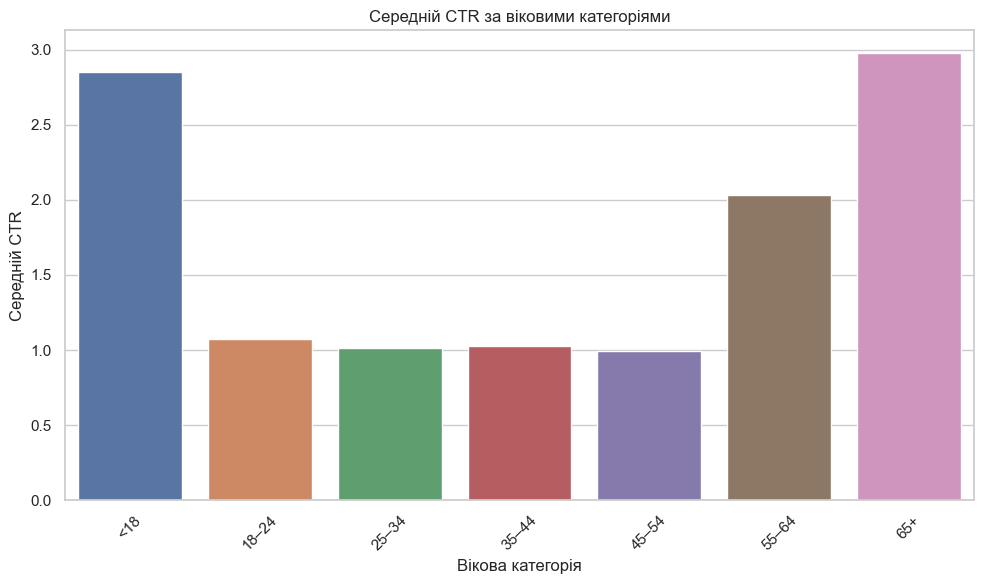

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df['CTR'] = df['Clicks'] / df['Impressions']*100
df_ctr = df.groupby('age_group')['CTR'].mean().reset_index()
age_order = ["<18", "18–24", "25–34", "35–44", "45–54", "55–64", "65+"]
df_ctr['age_group'] = pd.Categorical(df_ctr['age_group'], categories=age_order, ordered=True)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_ctr, x='age_group', y='CTR')
plt.xlabel('Вікова категорія')
plt.ylabel('Середній CTR')
plt.title('Середній CTR за віковими категоріями')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Після цього було знайдено середній ctr(відношення переглядів до показів)  за кожною віковою категорією за перший день. Виявилось що ctr найбільший серед вікових категорій <18, та 65+.

In [12]:
dfs = []

for day in range(1, 32):

    filename = f'data/nyt{day}.csv'

    dfr = pd.read_csv(filename)
    dfs.append(dfr)

all_df = pd.concat(dfs, ignore_index=True)
print(all_df.head())

   Age  Gender  Impressions  Clicks  Signed_In
0   36       0            3       0          1
1   73       1            3       0          1
2   30       0            3       0          1
3   49       1            3       0          1
4   47       1           11       0          1
   Age  Gender  Impressions  Clicks  Signed_In
0   36       0            3       0          1
1   73       1            3       0          1
2   30       0            3       0          1
3   49       1            3       0          1
4   47       1           11       0          1


Далі було об'єднано дані за всі 31 день.

In [13]:
all_df['age_group'] = all_df['Age'].apply(categorize_age)

print(all_df.head())

   Age  Gender  Impressions  Clicks  Signed_In age_group
0   36       0            3       0          1     35–44
1   73       1            3       0          1       65+
2   30       0            3       0          1     25–34
3   49       1            3       0          1     45–54
4   47       1           11       0          1     45–54


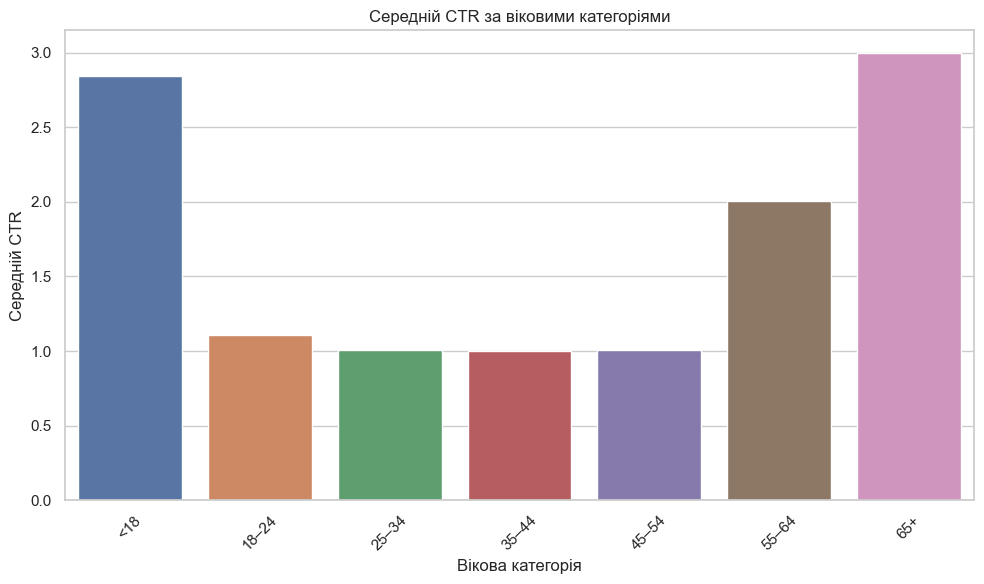

In [14]:
all_df['CTR'] = all_df['Clicks'] / all_df['Impressions']*100
all_df_ctr = all_df.groupby('age_group')['CTR'].mean().reset_index()
all_df_ctr['age_group'] = pd.Categorical(all_df_ctr['age_group'], categories=age_order, ordered=True)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=all_df_ctr, x='age_group', y='CTR')
plt.xlabel('Вікова категорія')
plt.ylabel('Середній CTR')
plt.title('Середній CTR за віковими категоріями')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Показники середнього ctr аналогічні до показників за один день. Досі середній сtr найвищий серед категорій <18 та 65+. На данний момент виглядає логічно,оскільки у людей з цих вікових категорій може бути найбільше вільного часу на перегляд реклами.

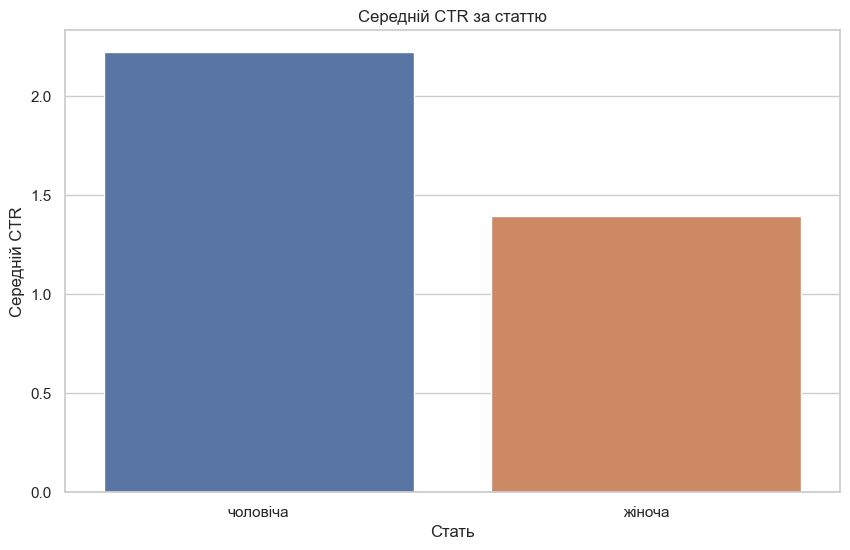

In [8]:

all_df_gender_ctr = all_df.groupby('Gender')['CTR'].mean().reset_index()
all_df_gender_ctr['Gender'] = all_df_gender_ctr['Gender'].map({0: 'чоловіча', 1: 'жіноча'})
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=all_df_gender_ctr, x='Gender', y='CTR')
plt.xlabel('Стать')
plt.ylabel('Середній CTR')
plt.title('Середній CTR за статтю')
plt.show()


Порівняв ctr за статтю, показники виявились вищими для чоловічої.

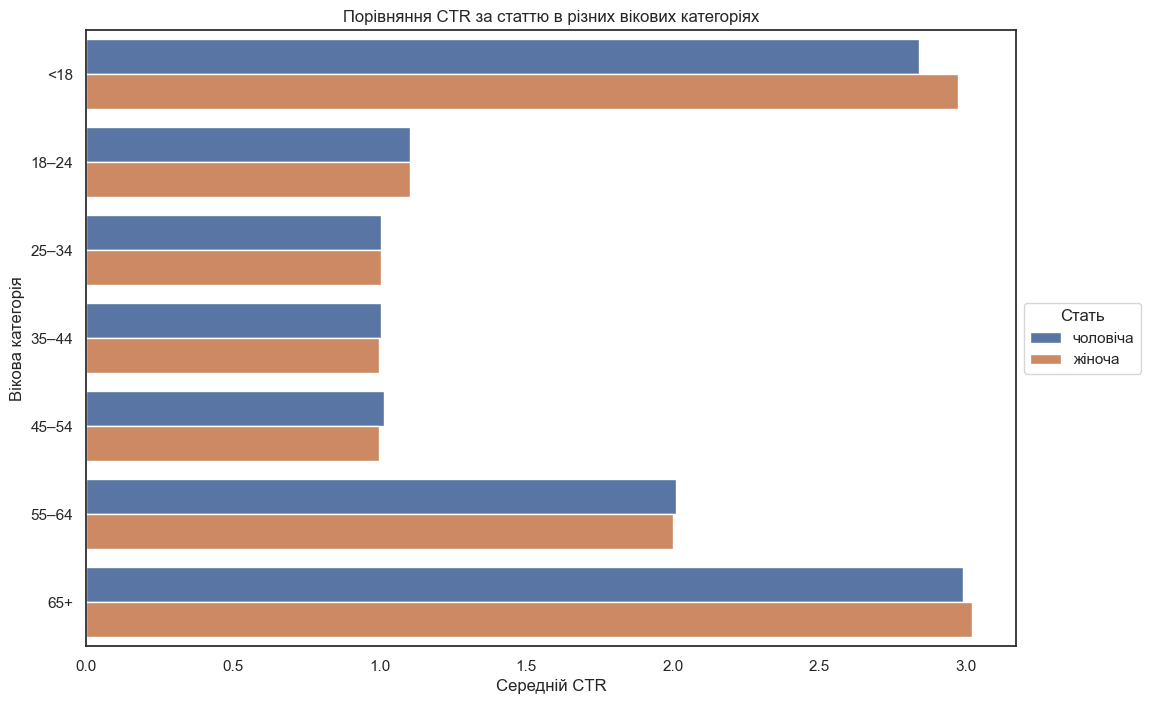

In [21]:

age_order_1 = ["<18", "18–24", "25–34", "35–44", "45–54", "55–64", "65+"]
all_df['age_group'] = pd.Categorical(all_df['age_group'], categories=age_order_1, ordered=True)
all_df_ac = all_df.sort_values(by='age_group')
all_df_ac['Gender'] = all_df_ac['Gender'].map({0: 'чоловіча', 1: 'жіноча'})
sns.set(style="white")

plt.figure(figsize=(12, 8))
sns.barplot(data=all_df_ac, y='age_group', x='CTR', hue='Gender', ci=None)
plt.xlabel('Середній CTR')
plt.ylabel('Вікова категорія')
plt.title('Порівняння CTR за статтю в різних вікових категоріях')
plt.legend(title='Стать', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


Проте порівняння ctr за статтю дало неочікуваний результат, оскільки у категоріях з найбільшим середнім ctr, він виявився більшим у жінок, і загалом зовсім не видно тієї значної різниці ctr між жінками та чоловіками як на попередньому графіку.

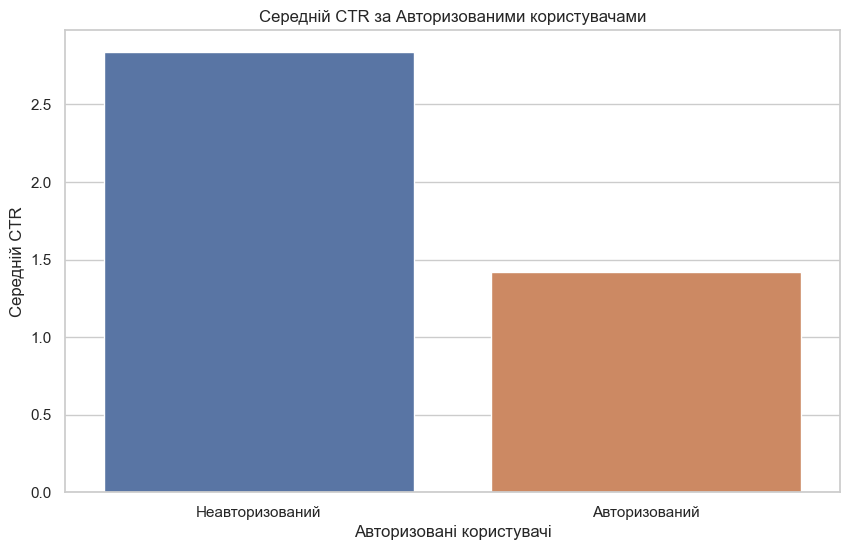

In [22]:
all_df_s_in_ctr = all_df.groupby('Signed_In')['CTR'].mean().reset_index()
all_df_s_in_ctr['Signed_In'] = all_df_s_in_ctr['Signed_In'].map({0: 'Неавторизований', 1: 'Авторизований'})
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=all_df_s_in_ctr, x='Signed_In', y='CTR')
plt.xlabel('Авторизовані користувачі')
plt.ylabel('Середній CTR')
plt.title('Середній CTR за Авторизованими користувачами')
plt.show()

Було порівняно ctr за авторизацією користувачів.Серед неавторизованих показники вищі.

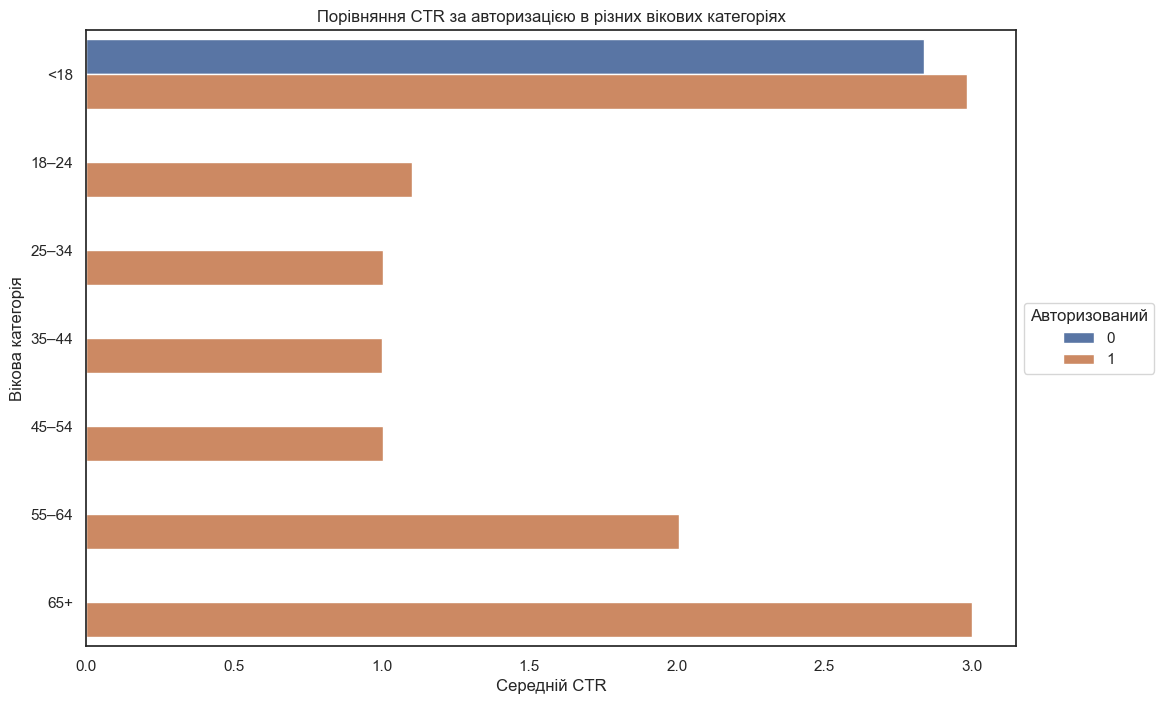

In [23]:

sns.set(style="white")

plt.figure(figsize=(12, 8))
sns.barplot(data=all_df, y='age_group', x='CTR', hue='Signed_In', ci=None)
plt.xlabel('Середній CTR')
plt.ylabel('Вікова категорія')
plt.title('Порівняння CTR за авторизацією в різних вікових категоріях')
plt.legend(title='Авторизований', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Після порівняння CTR за авторизацією в різних вікових категоріях була знайдена дуже цікава відповідність. Усі неавторизовані користувачі підпадають під категорію менше 18. Тобто цілком логічно , якщо користувач неавторизований, то в графі вік у нього 0, і при діленні на вікові категорії ці користувачі підпали під цю категорію.


In [24]:
count_female = (all_df['Gender'] == 1).sum()

print("Кількість жінок:", count_female)

Кількість жінок: 4815673


In [25]:
count_male = (all_df['Gender'] == 0).sum()

print("Кількість чоловіків:", count_male)

Кількість чоловіків: 10090192


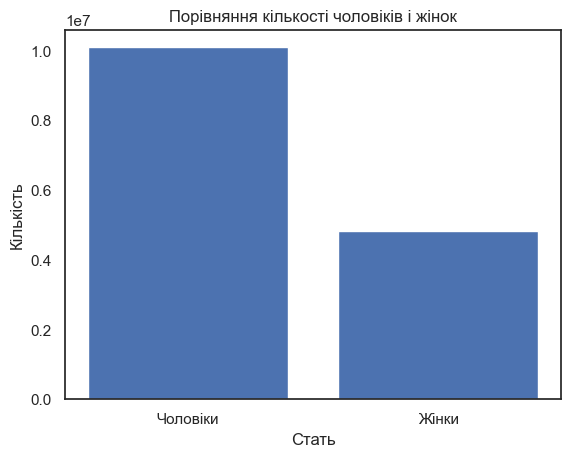

In [26]:

gender_counts = [count_male, count_female]
gender_labels = ['Чоловіки', 'Жінки']

plt.bar(gender_labels, gender_counts)
plt.xlabel('Стать')
plt.ylabel('Кількість')
plt.title('Порівняння кількості чоловіків і жінок')
plt.show()

Далі було порівняно кількість чоловіків і жінок.Чоловіків виявилось непропорційно більше

In [27]:
count_in = (all_df['Signed_In'] == 1).sum()

print("Кількість авторизованих:", count_in)

Кількість авторизованих: 9292255


In [28]:
count_out = (all_df['Signed_In'] == 0).sum()

print("Кількість неавторизованих:", count_out)

Кількість неавторизованих: 5613610


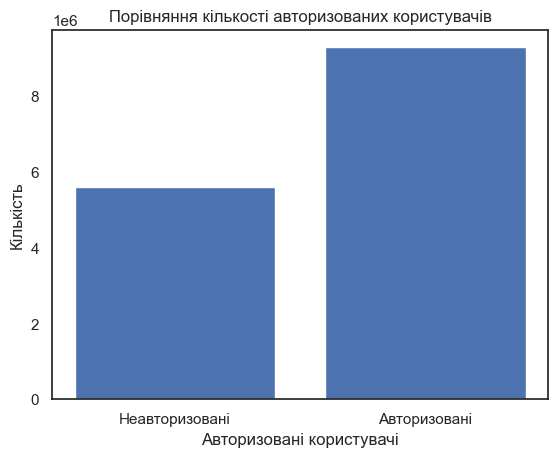

In [29]:
gender_counts = [count_out, count_in]
gender_labels = ['Неавторизовані', 'Авторизовані']

plt.bar(gender_labels, gender_counts)
plt.xlabel('Авторизовані користувачі')
plt.ylabel('Кількість')
plt.title('Порівняння кількості авторизованих користувачів')
plt.show()

Серед авторизованих та не авторизованих, авторизованих більше

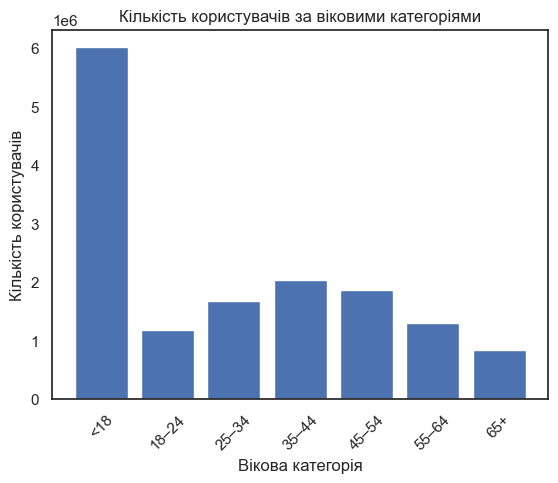

In [30]:
age_categories = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
count_18 = len(all_df[all_df['age_group'] == '<18'])
count_18_24 = len(all_df[all_df['age_group'] == '18–24'])
count_25_34 = len(all_df[all_df['age_group'] == '25–34'])
count_35_44 = len(all_df[all_df['age_group'] == '35–44'])
count_45_54 = len(all_df[all_df['age_group'] == '45–54'])
count_55_64 = len(all_df[all_df['age_group'] == '55–64'])
count_65_plus = len(all_df[all_df['age_group'] == '65+'])
user_counts = [count_18, count_18_24, count_25_34, count_35_44, count_45_54, count_55_64, count_65_plus]

plt.bar(age_categories, user_counts)
plt.xlabel('Вікова категорія')
plt.ylabel('Кількість користувачів')
plt.title('Кількість користувачів за віковими категоріями')
plt.xticks(rotation=45)
plt.show()


Порівняння кількості користувачів за віковими категоріями довить те що усі неавторизовані були відмічені як <18.Оскільки ctr більший серед неавторизованих, то цілком зрозуміло що ctr був таким високим саме через це

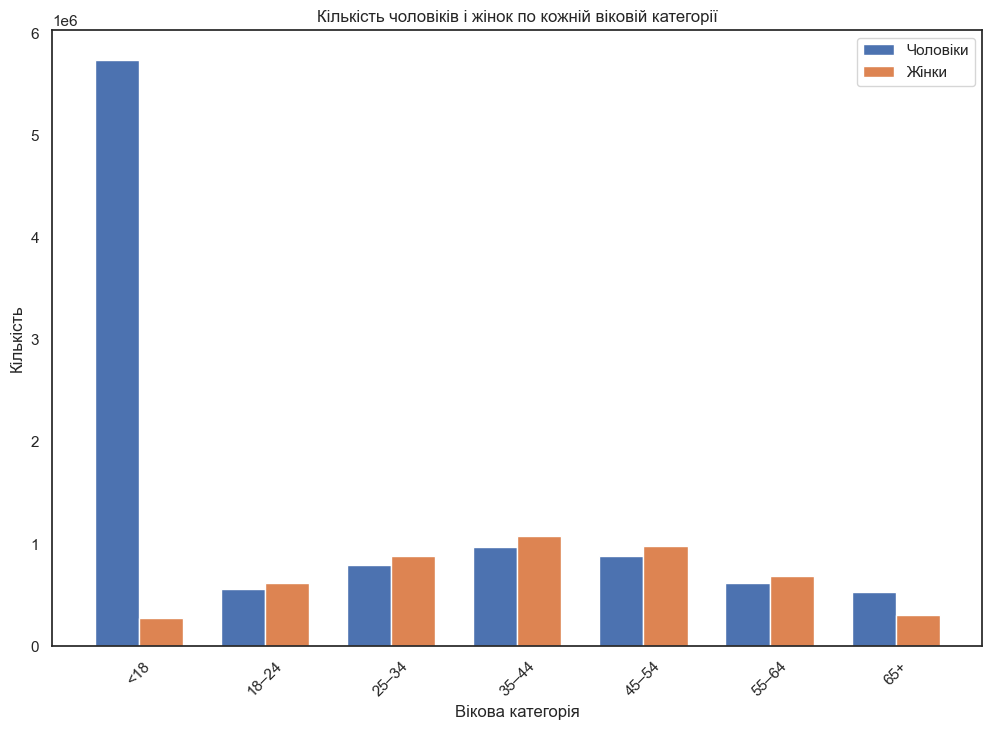

In [32]:

age_categories = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
genders = [0, 1]
count_male_18 = []
count_male_18_24 = []
count_male_25_34 = []
count_male_35_44 = []
count_male_45_54 = []
count_male_55_64 = []
count_male_65_plus = []

count_female_18 = []
count_female_18_24 = []
count_female_25_34 = []
count_female_35_44 = []
count_female_45_54 = []
count_female_55_64 = []
count_female_65_plus = []

for age_category in age_categories:
    for gender in genders:
        count = len(all_df[(all_df['age_group'] == age_category) & (all_df['Gender'] == gender)])

        if gender == 0:
            if age_category == '<18':
                count_male_18.append(count)
            elif age_category == '18–24':
                count_male_18_24.append(count)
            elif age_category == '25–34':
                count_male_25_34.append(count)
            elif age_category == '35–44':
                count_male_35_44.append(count)
            elif age_category == '45–54':
                count_male_45_54.append(count)
            elif age_category == '55–64':
                count_male_55_64.append(count)
            elif age_category == '65+':
                count_male_65_plus.append(count)
        elif gender == 1:
            if age_category == '<18':
                count_female_18.append(count)
            elif age_category == '18–24':
                count_female_18_24.append(count)
            elif age_category == '25–34':
                count_female_25_34.append(count)
            elif age_category == '35–44':
                count_female_35_44.append(count)
            elif age_category == '45–54':
                count_female_45_54.append(count)
            elif age_category == '55–64':
                count_female_55_64.append(count)
            elif age_category == '65+':
                count_female_65_plus.append(count)

import numpy as np

age_categories = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
male_counts = [count_male_18, count_male_18_24, count_male_25_34, count_male_35_44, count_male_45_54, count_male_55_64, count_male_65_plus]
female_counts = [count_female_18, count_female_18_24, count_female_25_34, count_female_35_44, count_female_45_54, count_female_55_64, count_female_65_plus]

avg_male_counts = [np.mean(male_counts[i]) for i in range(len(age_categories))]
avg_female_counts = [np.mean(female_counts[i]) for i in range(len(age_categories))]
bar_width = 0.35

index = np.arange(len(age_categories))

plt.figure(figsize=(12, 8))
plt.bar(index, avg_male_counts, bar_width, label='Чоловіки')
plt.bar(index + bar_width, avg_female_counts, bar_width, label='Жінки')

plt.xlabel('Вікова категорія')
plt.ylabel('Кількість')
plt.title('Кількість чоловіків і жінок по кожній віковій категорії')
plt.xticks(index + bar_width / 2, age_categories, rotation=45)
plt.legend()

plt.show()



При порівнянні кількості чоловіків і жінок по кожній віковій категорії, також виявилось що кількість чоловіків серед категорії <18 набагато більше і близько дорівнює кількості неавторизованих користувачів.Тож можна зробити висновок що стать 0 у данних відповідає не тільки за чоловічу стать але й за відсутність даних. Тож оскільки показники неавторизованих невідомі треба створити новий датафрейм без них щоб реально проаналізувати людей та їх ctr.



In [9]:

filtered_df = all_df[all_df['Signed_In'] == 1]

print(filtered_df.head())


   Age  Gender  Impressions  Clicks  Signed_In age_group  CTR
0   36       0            3       0          1     35–44  0.0
1   73       1            3       0          1       65+  0.0
2   30       0            3       0          1     25–34  0.0
3   49       1            3       0          1     45–54  0.0
4   47       1           11       0          1     45–54  0.0


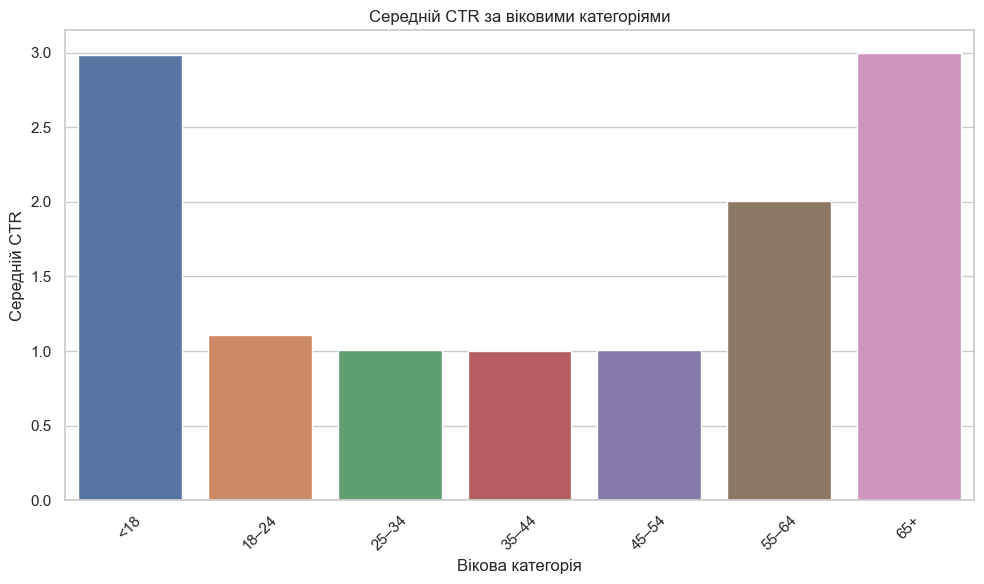

In [10]:
filtered_df_ctr = filtered_df.groupby('age_group')['CTR'].mean().reset_index()
filtered_df_ctr['age_group'] = pd.Categorical(filtered_df_ctr['age_group'], categories=age_order, ordered=True)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df_ctr, x='age_group', y='CTR')
plt.xlabel('Вікова категорія')
plt.ylabel('Середній CTR')
plt.title('Середній CTR за віковими категоріями')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Тепер ми маємо реальні дані ctr по віковим групам. Тенденція збереглася, проте ctr серед <18 став навіть більшим

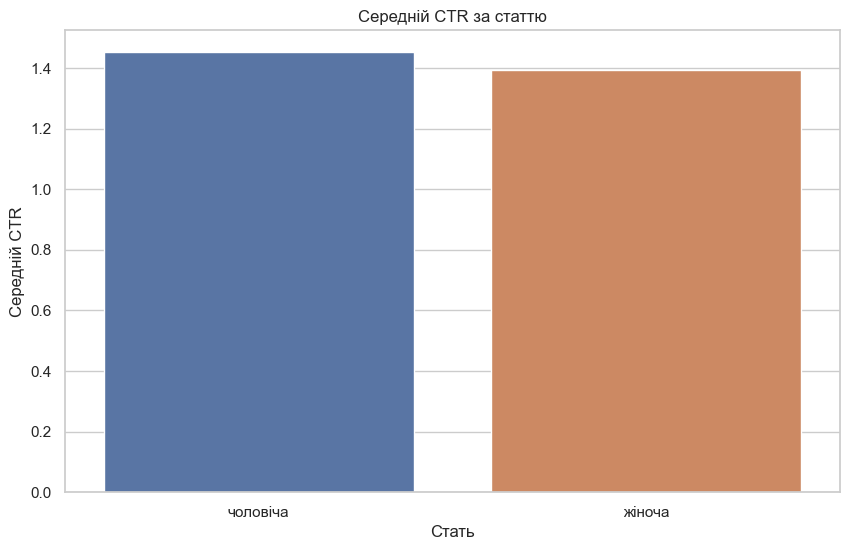

In [15]:
filtered_df_gender_ctr = filtered_df.groupby('Gender')['CTR'].mean().reset_index()
filtered_df_gender_ctr['Gender'] = filtered_df_gender_ctr['Gender'].map({0: 'чоловіча', 1: 'жіноча'})
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df_gender_ctr, x='Gender', y='CTR')
plt.xlabel('Стать')
plt.ylabel('Середній CTR')
plt.title('Середній CTR за статтю')
plt.show()


Тепер коли було прибрано дизбаланс з неавторизованих користувачів, дані ctr по статті є майже однаковими, хоча відгук у чоловіків все одно дещо більший

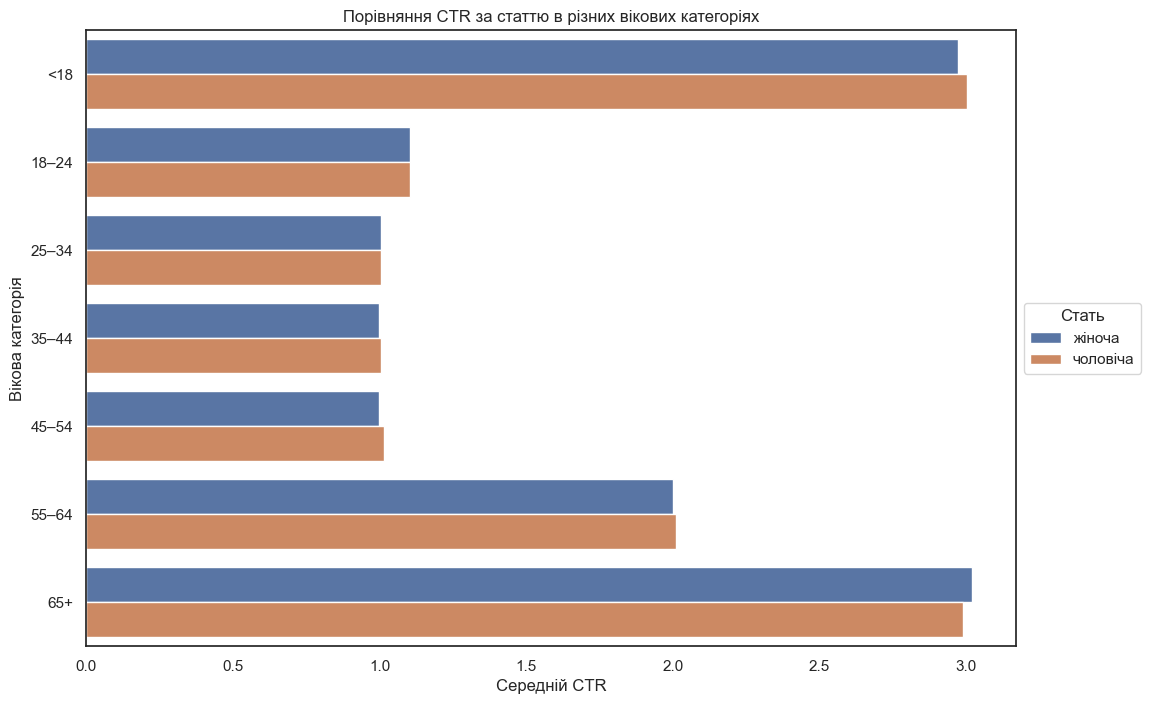

In [16]:
filtered_df_age_order = ["<18", "18–24", "25–34", "35–44", "45–54", "55–64", "65+"]
filtered_df['age_group'] = pd.Categorical(filtered_df['age_group'], categories=age_order, ordered=True)
filtered_df_ac = filtered_df.sort_values(by='age_group')
filtered_df_ac['Gender'] = filtered_df_ac['Gender'].map({0: 'чоловіча', 1: 'жіноча'})
sns.set(style="white")

plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_df_ac, y='age_group', x='CTR', hue='Gender', ci=None)
plt.xlabel('Середній CTR')
plt.ylabel('Вікова категорія')
plt.title('Порівняння CTR за статтю в різних вікових категоріях')
plt.legend(title='Стать', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


Таким чином відгук серед жінок більший у віковій категорії до 18, а у чоловіків після 65. В інших майже однаковий

In [17]:
count_female = (filtered_df['Gender'] == 1).sum()

print("Кількість жінок:", count_female)

Кількість жінок: 4815673


In [18]:
count_male = (filtered_df['Gender'] == 0).sum()

print("Кількість чоловіків:", count_male)

Кількість чоловіків: 4476582


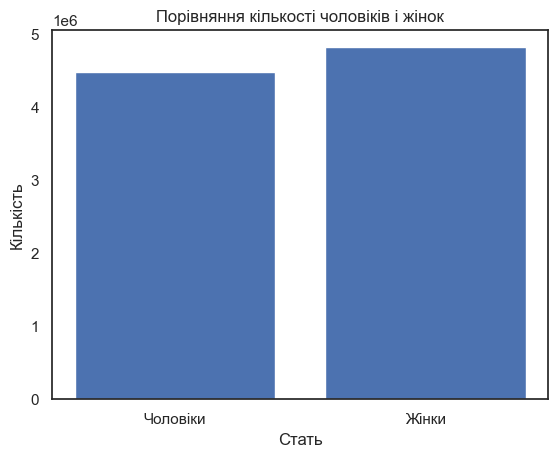

In [19]:
gender_counts = [count_male, count_female]
gender_labels = ['Чоловіки', 'Жінки']

plt.bar(gender_labels, gender_counts)
plt.xlabel('Стать')
plt.ylabel('Кількість')
plt.title('Порівняння кількості чоловіків і жінок')
plt.show()

Тепер дизбаланс зник, жінок трохи більше ніж чоловіків

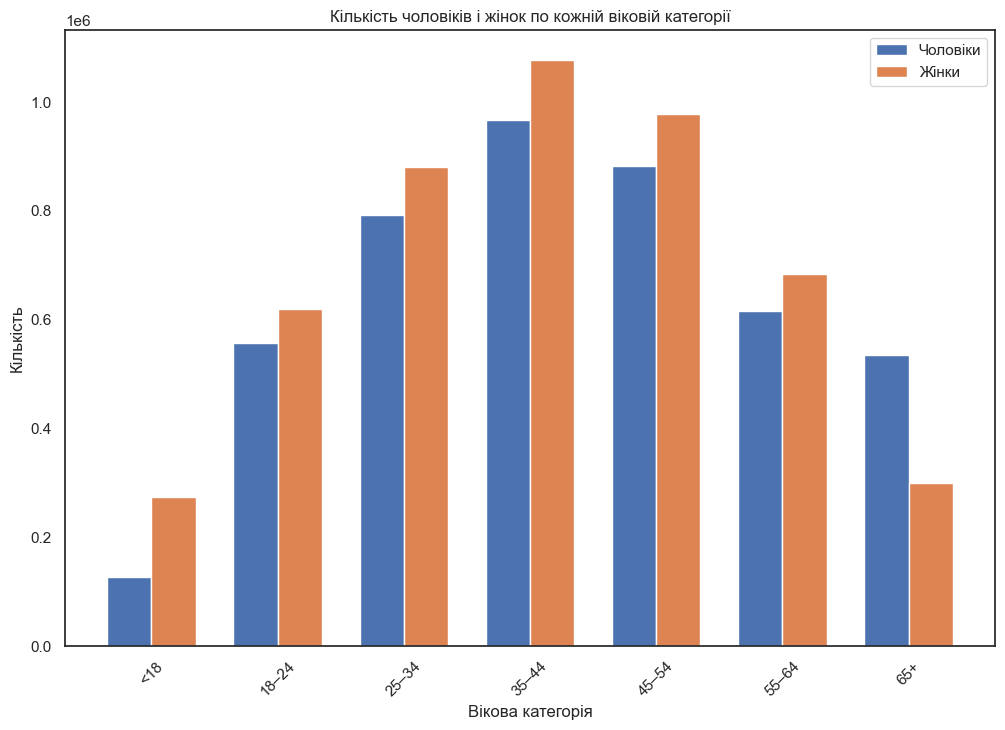

In [35]:
age_categories = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
genders = [0, 1]
count_male_18 = []
count_male_18_24 = []
count_male_25_34 = []
count_male_35_44 = []
count_male_45_54 = []
count_male_55_64 = []
count_male_65_plus = []

count_female_18 = []
count_female_18_24 = []
count_female_25_34 = []
count_female_35_44 = []
count_female_45_54 = []
count_female_55_64 = []
count_female_65_plus = []

for age_category in age_categories:
    for gender in genders:
        count = len(filtered_df[(filtered_df['age_group'] == age_category) & (filtered_df['Gender'] == gender)])

        if gender == 0:
            if age_category == '<18':
                count_male_18.append(count)
            elif age_category == '18–24':
                count_male_18_24.append(count)
            elif age_category == '25–34':
                count_male_25_34.append(count)
            elif age_category == '35–44':
                count_male_35_44.append(count)
            elif age_category == '45–54':
                count_male_45_54.append(count)
            elif age_category == '55–64':
                count_male_55_64.append(count)
            elif age_category == '65+':
                count_male_65_plus.append(count)
        elif gender == 1:
            if age_category == '<18':
                count_female_18.append(count)
            elif age_category == '18–24':
                count_female_18_24.append(count)
            elif age_category == '25–34':
                count_female_25_34.append(count)
            elif age_category == '35–44':
                count_female_35_44.append(count)
            elif age_category == '45–54':
                count_female_45_54.append(count)
            elif age_category == '55–64':
                count_female_55_64.append(count)
            elif age_category == '65+':
                count_female_65_plus.append(count)

import numpy as np

age_categories = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
male_counts = [count_male_18, count_male_18_24, count_male_25_34, count_male_35_44, count_male_45_54, count_male_55_64, count_male_65_plus]
female_counts = [count_female_18, count_female_18_24, count_female_25_34, count_female_35_44, count_female_45_54, count_female_55_64, count_female_65_plus]

avg_male_counts = [np.mean(male_counts[i]) for i in range(len(age_categories))]
avg_female_counts = [np.mean(female_counts[i]) for i in range(len(age_categories))]
bar_width = 0.35

index = np.arange(len(age_categories))

plt.figure(figsize=(12, 8))
plt.bar(index, avg_male_counts, bar_width, label='Чоловіки')
plt.bar(index + bar_width, avg_female_counts, bar_width, label='Жінки')

plt.xlabel('Вікова категорія')
plt.ylabel('Кількість')
plt.title('Кількість чоловіків і жінок по кожній віковій категорії')
plt.xticks(index + bar_width / 2, age_categories, rotation=45)
plt.legend()

plt.show()


В результаті ми бачимо що основна цільова аудиторія New York times це вікова категорія 35-44, у якій переважають жінки. Проте ctr у ній низький як у чоловіків так і у жінок. Серед категорій з найбільшим ctr до 18 та після 65 ситуація різна. Загалом аудиторія 65+ ширша ніж менше 18. У категорії менше 18 переважають дівчата. Серед категорії після 65 перважають чоловіки, серед яких і відзначається найбільший ctr. Тому найбільш ефектиними покази є саме для чоловіків після 65 , тому NYT доцільно створювати більше рекалами для цієї аудиторії.Серед аудиторії менше 18 рекламодавцям слід зконцентруватися на жіночій аудиторії. З іншими віковими категоріями доцільно дослідити нові підходи до створення та показу реклами, оскільки треба підвищити ефективність. Також для кращого таргетингу треба стимулювати неавторизованих користувачів реєструватися.Проте це не повинно бути занадто нав'язливо оскільки ctr серед неавторизованих вищій.

In [9]:
import pandas as pd


files = [f'data/nyt{day}.csv' for day in range(1, 32)]

dfs = []

for day, file in enumerate(files, start=1):
    df = pd.read_csv(file)
    df['день'] = day
    dfs.append(df)


all_df_days = pd.concat(dfs, ignore_index=True)
all_df_days['CTR'] = all_df_days['Clicks'] / all_df_days['Impressions']*100
all_df_days['age_group'] = all_df_days['Age'].apply(categorize_age)

print(all_df_days.tail())


          Age  Gender  Impressions  Clicks  Signed_In  день   CTR age_group
14905860   41       1            4       0          1    31   0.0     35–44
14905861    0       0            5       0          0    31   0.0       <18
14905862   22       1            3       0          1    31   0.0     18–24
14905863   59       0            5       1          1    31  20.0     55–64
14905864   29       1            4       0          1    31   0.0     25–34


Далі для вивчення статистики по дням було створено новий df з полем день та додано необхідні поля CTR та age_group

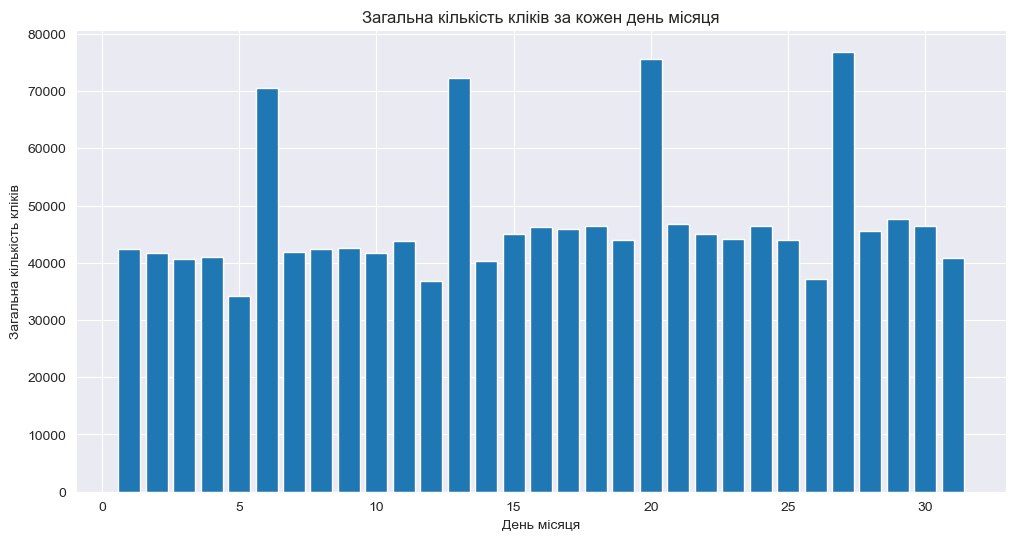

In [21]:
import matplotlib.pyplot as plt

daily_clicks = all_df_days.groupby('день')['Clicks'].sum()


plt.figure(figsize=(12, 6))
plt.bar(daily_clicks.index, daily_clicks.values)

plt.xlabel('День місяця')
plt.ylabel('Загальна кількість кліків')
plt.title('Загальна кількість кліків за кожен день місяця')


plt.show()


Оскільки у нас відстуня статистика по відвідуванності сайту то можна переглянути кількість кліків. І на графіку чітко видно що люди клікають на рекламу у певні дні частіше ніж в інші, крім того вони відбуваються періодично, тому можна припустити що це вихідні


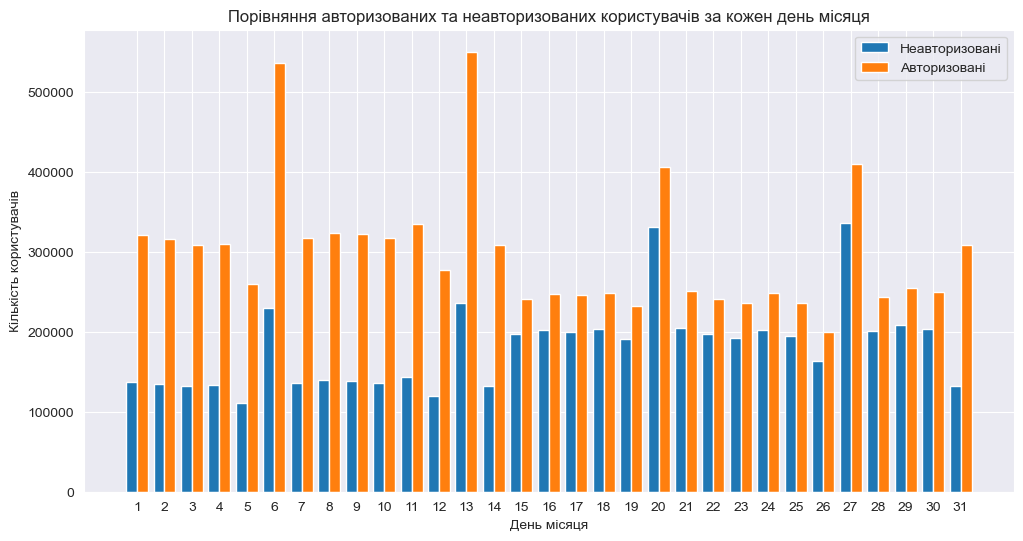

In [14]:
import matplotlib.pyplot as plt

daily_auth_counts = all_df_days.groupby(['день', 'Signed_In'])['Age'].count().unstack().fillna(0)

plt.figure(figsize=(12, 6))
x = daily_auth_counts.index
width = 0.4

plt.bar(x - width/2, daily_auth_counts[0], width, label='Неавторизовані', align='center')
plt.bar(x + width/2, daily_auth_counts[1], width, label='Авторизовані', align='center')

plt.xlabel('День місяця')
plt.ylabel('Кількість користувачів')
plt.title('Порівняння авторизованих та неавторизованих користувачів за кожен день місяця')
plt.xticks(x)
plt.legend()

plt.show()


Після порівняння кількості авторизованих та неавторизованих чітко видно що авторизованих більше, проте до кінця місяця кількість авторизованих дещо зменшується а неавторизованих збільшується. На мою думку це може бути пов'язано з неефективеністю подітики nyt щодо авторизації.

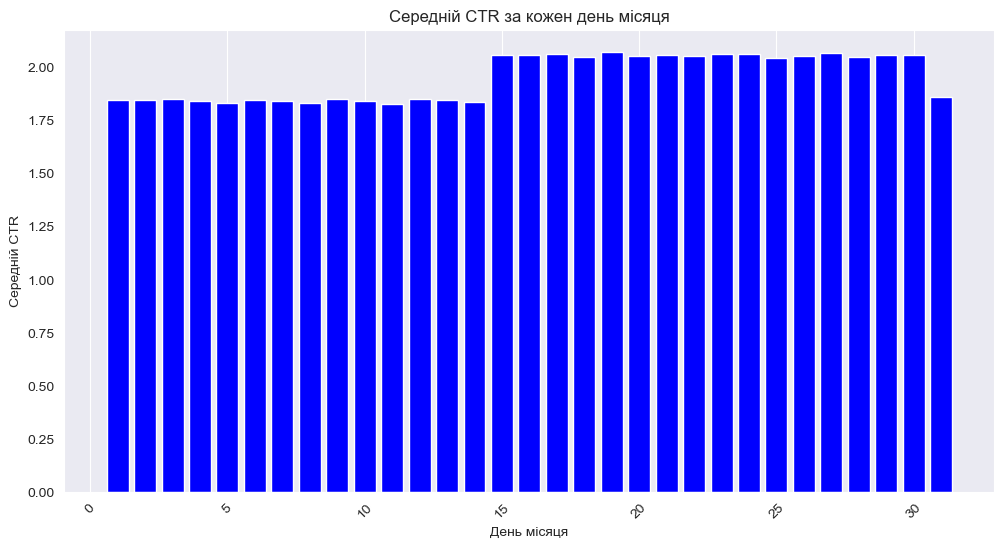

In [17]:

daily_ctr = all_df_days.groupby('день')['CTR'].mean()

plt.figure(figsize=(12, 6))
plt.bar(daily_ctr.index, daily_ctr.values, color='b')
plt.xlabel('День місяця')
plt.ylabel('Середній CTR')
plt.title('Середній CTR за кожен день місяця')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



На цьому графіку можна побачити що 15 числа середній ctr досить значно зріс, відповідно до даних з минулого графіку це пов'язано з різким збільшенням відсотку неавторизованих користувачів, у яких ctr більший

In [10]:
filtered_df_days = all_df_days[all_df_days['Signed_In'] == 1]
print(filtered_df_days.head())

   Age  Gender  Impressions  Clicks  Signed_In  день  CTR age_group
0   36       0            3       0          1     1  0.0     35–44
1   73       1            3       0          1     1  0.0       65+
2   30       0            3       0          1     1  0.0     25–34
3   49       1            3       0          1     1  0.0     45–54
4   47       1           11       0          1     1  0.0     45–54


Після цього було створено відфільтрований варіант тільки з авторизованими користувачами

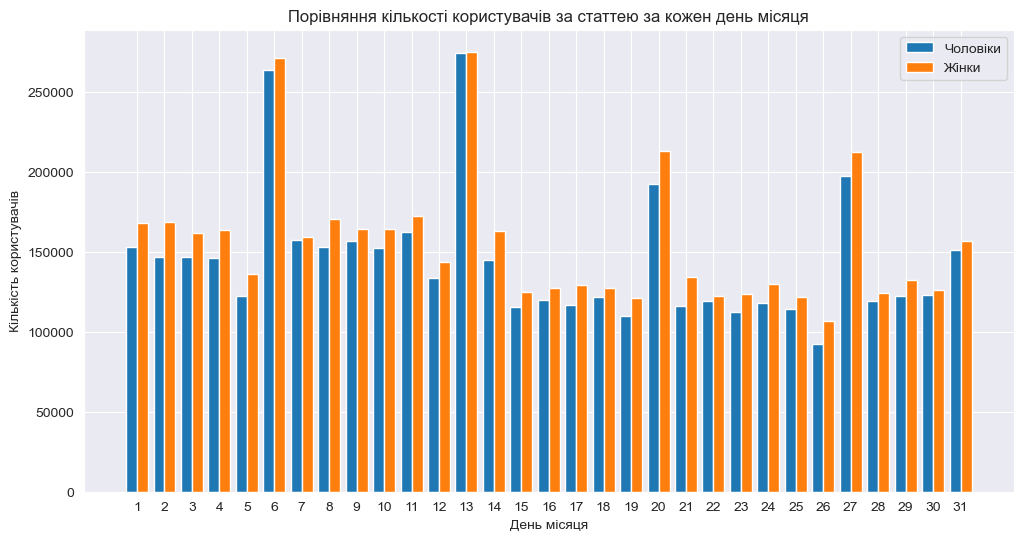

In [19]:

import matplotlib.pyplot as plt

daily_gender_counts = filtered_df_days.groupby(['день', 'Gender'])['Age'].count().unstack().fillna(0)


plt.figure(figsize=(12, 6))
x = daily_gender_counts.index
width = 0.4

plt.bar(x - width/2, daily_gender_counts[0], width, label='Чоловіки', align='center')
plt.bar(x + width/2, daily_gender_counts[1], width, label='Жінки', align='center')

plt.xlabel('День місяця')
plt.ylabel('Кількість користувачів')
plt.title('Порівняння кількості користувачів за статтею за кожен день місяця')
plt.xticks(x)
plt.legend()

plt.show()



Таким чином видно що кожного дня кількість жінок кожного дня більша за кількість чоловіків лише 13 числа кількість майже однакова


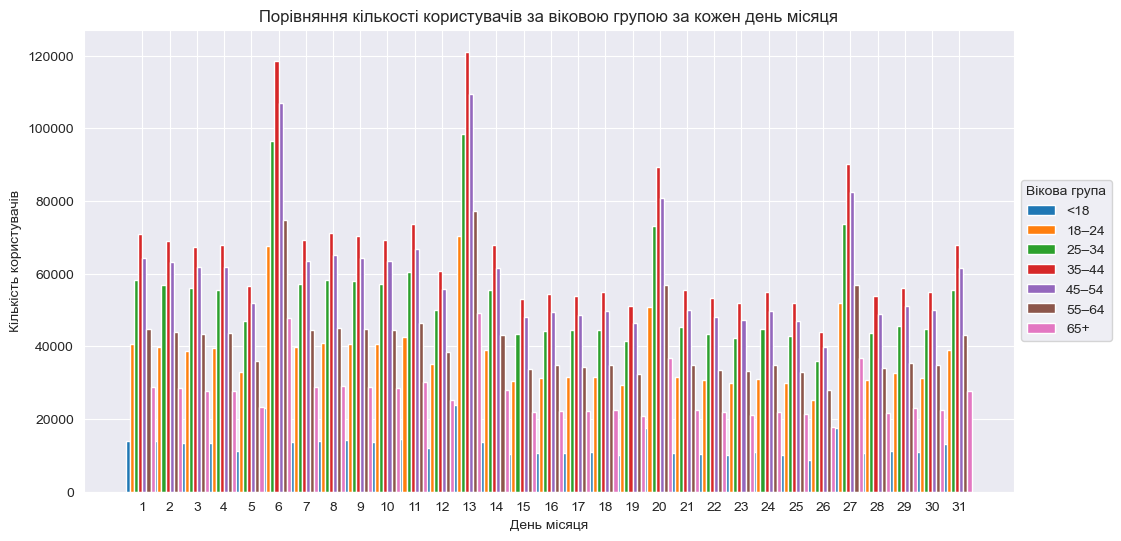

In [20]:
import matplotlib.pyplot as plt

daily_age_counts = filtered_df_days.groupby(['день', 'age_group'])['Age'].count().unstack().fillna(0)

plt.figure(figsize=(12, 6))
x = daily_age_counts.index

age_categories = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
num_categories = len(age_categories)
width = 0.15

for i, age_category in enumerate(age_categories):
    plt.bar(x - (num_categories / 2 * width) + i * width, daily_age_counts[age_category], width, label=age_category, align='center')

plt.xlabel('День місяця')
plt.ylabel('Кількість користувачів')
plt.title('Порівняння кількості користувачів за віковою групою за кожен день місяця')
plt.xticks(x)
plt.legend(title='Вікова група', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


Цей графік показує що відсутні відхилення по кількості користувачів певних вікових категорій у конкретні дні